In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
df =pd.read_csv('/content/drive/MyDrive/datasets/SeoulBikeData.csv')

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Date                            8760 non-null   object 
 1   Rented Bike Count               8760 non-null   int64  
 2   Hour                            8760 non-null   int64  
 3   Temperature(Celsius)            8760 non-null   float64
 4   Humidity(percent)               8760 non-null   int64  
 5   Wind speed (metre per second)   8760 non-null   float64
 6   Visibility (10m)                8760 non-null   int64  
 7   Dew point temperature(Celsius)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)         8760 non-null   float64
 9   Rainfall(mm)                    8760 non-null   float64
 10  Snowfall (cm)                   8760 non-null   float64
 11  Seasons                         8760 non-null   object 
 12  Holiday                         87

In [8]:
df.shape # has 8760 rows and 14 columns

(8760, 14)

In [5]:
# 1. Null values

df.isnull().sum()

,0
Date,0
Rented Bike Count,0
Hour,0
Temperature(Celsius),0
Humidity(percent),0
Wind speed (metre per second),0
Visibility (10m),0
Dew point temperature(Celsius),0
Solar Radiation (MJ/m2),0
Rainfall(mm),0


In [24]:
df.head(3)

,Date,Rented Bike Count,Hour,Temperature(Celsius),Humidity(percent),Wind speed (metre per second),Visibility (10m),Dew point temperature(Celsius),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,1/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,1/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,1/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes


In [6]:
# 2. Outliers

df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(Celsius)',
       'Humidity(percent)', 'Wind speed (metre per second)',
       'Visibility (10m)', 'Dew point temperature(Celsius)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

<Axes: ylabel='Rented Bike Count'>

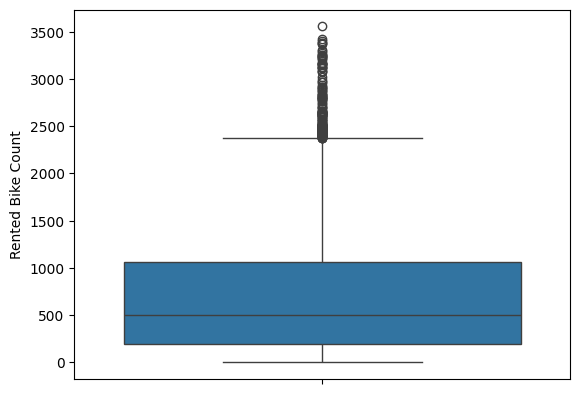

In [6]:
sns.boxplot(df['Rented Bike Count'])

<Axes: xlabel='Rented Bike Count', ylabel='Density'>

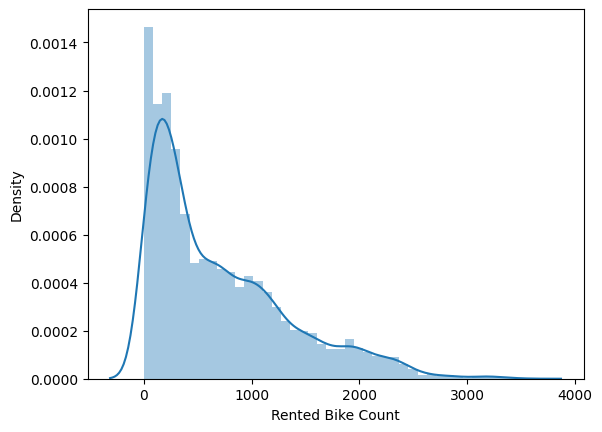

In [7]:
sns.distplot(df['Rented Bike Count'])


In [9]:
df['Rented Bike Count'].skew()

np.float64(1.1534281773679014)

In [8]:
df[df['Rented Bike Count'] <= 0] ['Rented Bike Count'].head()

,Rented Bike Count
3144,0
3145,0
3146,0
3147,0
3148,0


<Axes: xlabel='Rented Bike Count', ylabel='Density'>

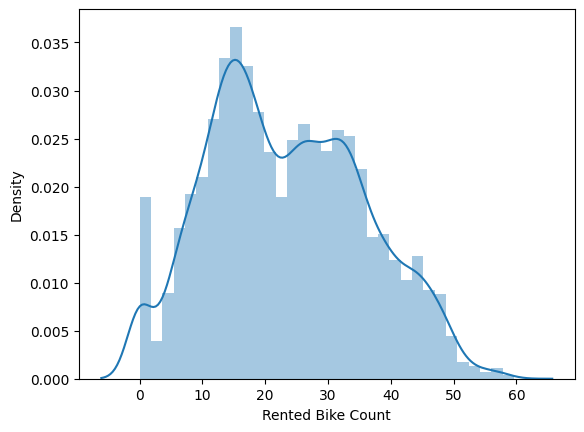

In [9]:
# rented bike count has 0's and so logp doesn't work.
sns.distplot(np.sqrt(df['Rented Bike Count']))

In [12]:
df['Rented Bike Count'] = np.sqrt(df['Rented Bike Count'])

<Axes: ylabel='Wind speed (metre per second)'>

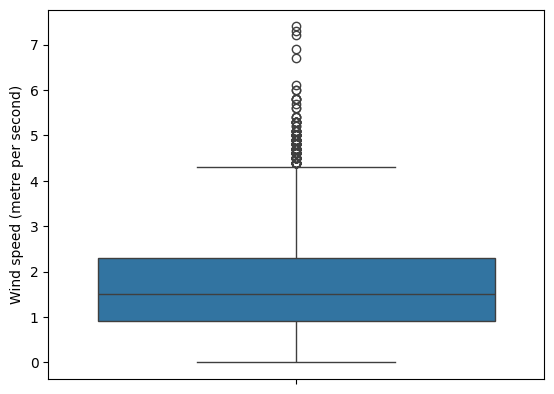

In [13]:
sns.boxplot(df['Wind speed (metre per second)'])

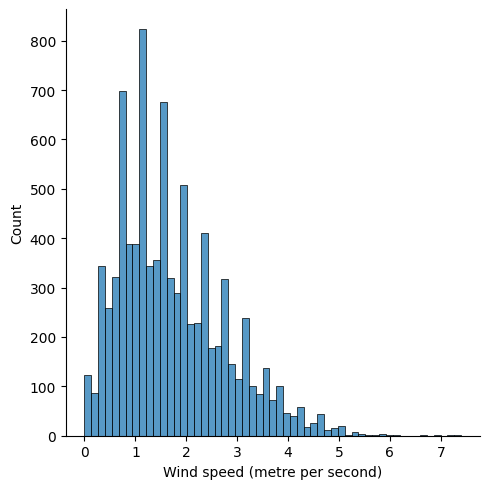

In [14]:
sns.displot(df['Wind speed (metre per second)'])

In [16]:
df['Wind speed (metre per second)'].skew()

np.float64(0.8909547980299266)

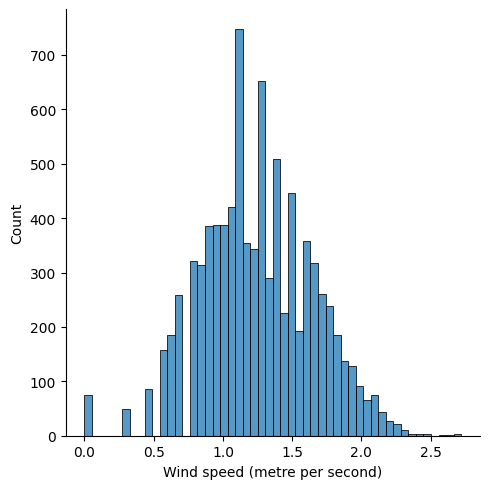

In [10]:
sns.displot(np.sqrt(df['Wind speed (metre per second)']))

In [11]:
df['Wind speed (metre per second)'] = np.sqrt(df['Wind speed (metre per second)'])

In [18]:
df.columns


Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(Celsius)',
       'Humidity(percent)', 'Wind speed (metre per second)',
       'Visibility (10m)', 'Dew point temperature(Celsius)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [19]:
df['Solar Radiation (MJ/m2)'].skew()

np.float64(1.5040397173602802)

<Axes: ylabel='Solar Radiation (MJ/m2)'>

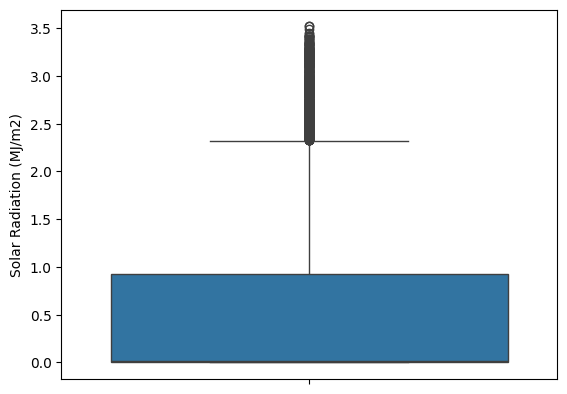

In [20]:
sns.boxplot(df['Solar Radiation (MJ/m2)'])

<Axes: ylabel='Rainfall(mm)'>

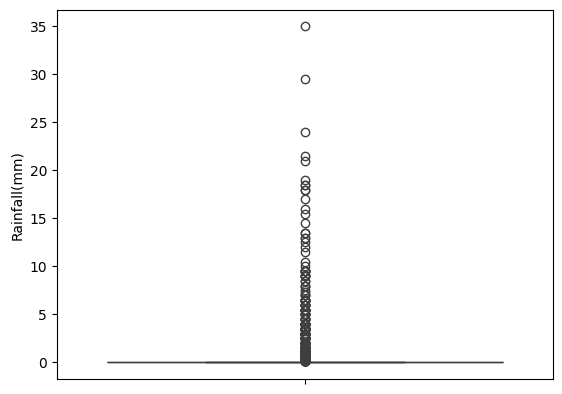

In [21]:
sns.boxplot(df['Rainfall(mm)'])


In [98]:
df['Rainfall(mm)'].skew()

np.float64(14.5332322425467)

In [45]:
df['Visibility (10m)'].skew()

np.float64(-0.7017864489502947)

In [ ]:
# 3. Feature engineering

In [22]:
df['Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 8760 entries, 0 to 8759
Series name: Date
Non-Null Count  Dtype 
--------------  ----- 
8760 non-null   object
dtypes: object(1)
memory usage: 68.6+ KB


In [12]:
df['Date']= pd.to_datetime(df['Date'], format= 'mixed')  # converting to datetime dtype

In [13]:
df['year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day_of_week

,year
0,2017
1,2017
2,2017
3,2017
4,2017
...,...
8755,2018
8756,2018
8757,2018
8758,2018


<Axes: xlabel='year', ylabel='Rented Bike Count'>

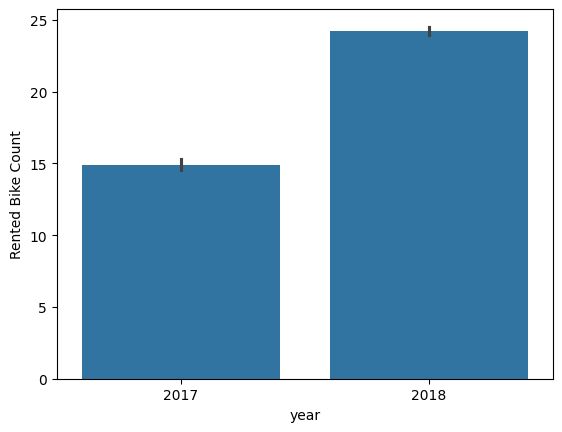

In [53]:
# Bike rented count by year
sns.barplot(x= df['year'], y = df['Rented Bike Count'])

## Bike count has increased in 2018

<Axes: xlabel='Seasons', ylabel='Rented Bike Count'>

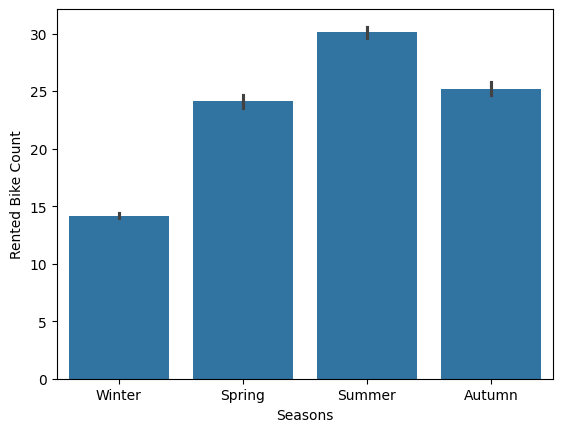

In [116]:
# Bike rented by season

sns.barplot( x= df['Seasons'], y= df['Rented Bike Count'])

## Bike count is higher in summer

<Axes: xlabel='Rented Bike Count', ylabel='Rainfall(mm)'>

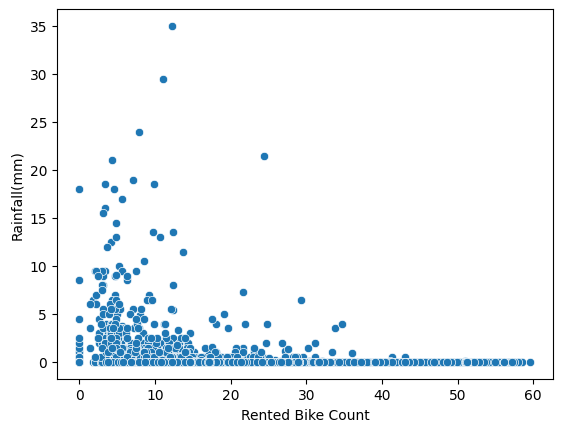

In [118]:
# Bike rent and rainfall

sns.scatterplot( x= df['Rented Bike Count'], y=df['Rainfall(mm)'])

In [36]:
bc_low_rainfall = df[(df['Rainfall(mm)'] <= 6)].groupby('Seasons')['Rented Bike Count'].sum()
bc_high_rainfall = df[(df['Rainfall(mm)'] > 6)].groupby('Seasons')['Rented Bike Count'].sum()
print("rainfall below 6mm:\n",bc_low_rainfall)
print("rainfall above 6mm:\n", bc_high_rainfall)



rainfall below 6mm: 
 Seasons
Autumn    54970.776283
Spring    53175.509081
Summer    66288.544323
Winter    30576.221294
Name: Rented Bike Count, dtype: float64
rainfall above 6mm:
 Seasons
Autumn     53.044611
Spring     64.609102
Summer    225.220550
Winter     10.210953
Name: Rented Bike Count, dtype: float64


<Axes: xlabel='Holiday', ylabel='Rented Bike Count'>

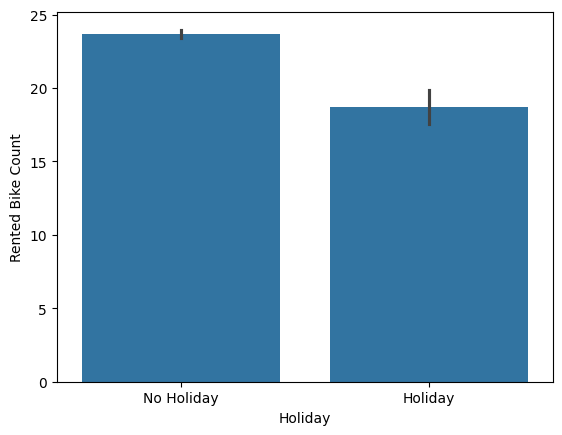

In [46]:
sns.barplot(x= df['Holiday'], y = df['Rented Bike Count'])

# More bikes are rented on non-holiday

In [56]:
df.groupby('Functioning Day')['Rented Bike Count'].sum()

,Rented Bike Count
Functioning Day,
No,0.000000
Yes,205364.136197


In [57]:
df['Rented Bike Count'].sum()

np.float64(205364.13619718247)

In [45]:
holiday_bc =df[(df['Holiday'] == 'Holiday')].groupby('Seasons')['Rented Bike Count'].sum()
N_holiday_bc = df[(df['Holiday'] == 'No Holiday')].groupby('Seasons')['Rented Bike Count'].sum()

print("Holiday:\n", holiday_bc)
print("No Holiday:\n", N_holiday_bc)

Holiday:
 Seasons
Autumn    2780.495621
Spring    1586.811546
Summer    1474.985490
Winter    2248.247142
Name: Rented Bike Count, dtype: float64
No Holiday:
 Seasons
Autumn    52243.325273
Spring    51653.306637
Summer    65038.779383
Winter    28338.185105
Name: Rented Bike Count, dtype: float64


In [58]:
df.head(3)

,Date,Rented Bike Count,Hour,Temperature(Celsius),Humidity(percent),Wind speed (metre per second),Visibility (10m),Dew point temperature(Celsius),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,year,Month,day
0,2017-01-12,15.937377,0,-5.2,37,1.483240,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,3
1,2017-01-12,14.282857,1,-5.5,38,0.894427,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,3
2,2017-01-12,13.152946,2,-6.0,39,1.000000,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,3


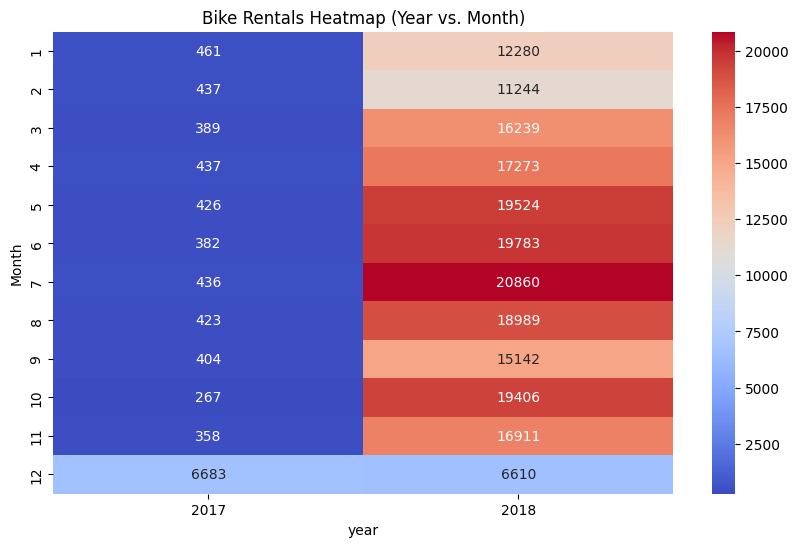

In [63]:
#  heatmap to see which month had highest bike rent count.

pivot_table = df.pivot_table(index='Month', columns='year', values='Rented Bike Count', aggfunc='sum')

plt.figure(figsize=(10,6))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt=".0f")
plt.title("Bike Rentals Heatmap (Year vs. Month)")
plt.show()


In [14]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(Celsius)',
       'Humidity(percent)', 'Wind speed (metre per second)',
       'Visibility (10m)', 'Dew point temperature(Celsius)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'year', 'Month', 'day'],
      dtype='object')

In [16]:
seasons = { 'Summer' : 0, 'Spring' : 1, 'Autumn' : 2, 'Winter' : 3}

df['Seasons']= df['Seasons'].map(seasons)
df['Seasons'].head(4)


,Seasons
0,3
1,3
2,3
3,3


In [17]:
Holiday_s = {'Holiday' :1, 'No Holiday': 0}
df['Holiday'] = df['Holiday'].map(Holiday_s)
df['Holiday'].head(3)

,Holiday
0,0
1,0
2,0


In [18]:
df['Functioning Day'].unique()

array(['Yes', 'No'], dtype=object)

In [21]:
Func = {'Yes' : 1, 'No': 0}
df['Functioning Day'] = df['Functioning Day'].map(Func)
df['Functioning Day'].head(3)

,Functioning Day
0,1
1,1
2,1


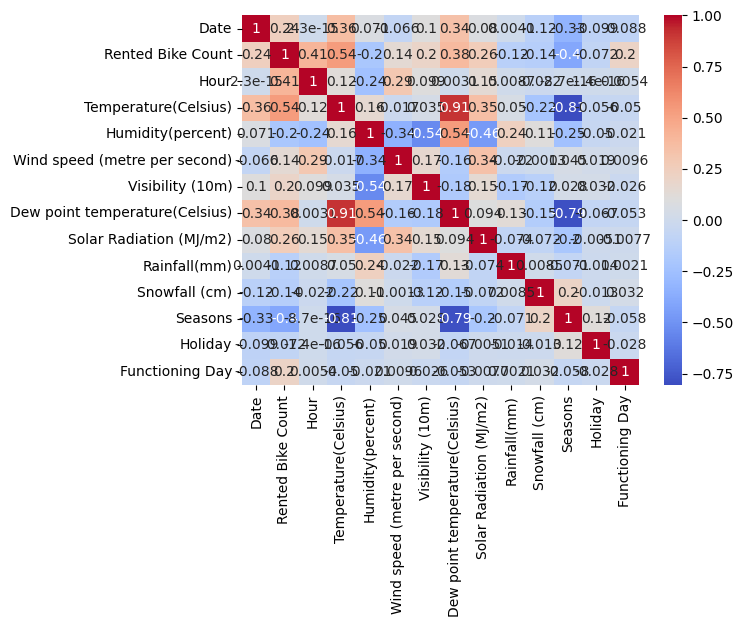

<Figure size 1200x1200 with 0 Axes>

In [29]:
data = ['Date', 'Rented Bike Count', 'Hour', 'Temperature(Celsius)',
       'Humidity(percent)', 'Wind speed (metre per second)',
       'Visibility (10m)', 'Dew point temperature(Celsius)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day']

corr_matrix = df[data].corr()
sns.heatmap( corr_matrix, annot = True, cmap = 'coolwarm')
plt.figure(figsize = (12,12))
plt.show()